# Exploratory Data Analysis: (dataset1) & Student Alcohol Consumption

**Group Number:** 97  
**Members:** Roy Rui #300176548 || Jiayi Ma #300263220
 



## Introduction (Draft)
The purpose of this report is to ______________
- **Educators** who want to understand student learning patterns.
- **School administrators** aiming to improve academic performance.
- **Researchers** analyzing student behavior.

We will provide **10 key insights** from our dataset, using Python for data analysis.

## Dataset I: Mobile Device Usage Dataset
**Author**: kaggle · Vala Khorasani   
**Ref**:  https://www.kaggle.com/datasets/valakhorasani/mobile-device-usage-and-user-behavior-dataset/data  
**Shape**: Main set (*user_behavior_dataset.csv*): **11 Columns 700 Rows**  
**Description**:  
| Feature | Description | Data Type |
|---------|------------|-----------|
| **user_id** | Unique user identifier | Categorical |
| **device_type** | Type of mobile device | Categorical |
| **screen_time** | Daily screen time (minutes) | Numerical |
| **app_usage** | Number of apps used per day | Numerical |
| **social_media_time** | Time spent on social media (minutes) | Numerical |
| **gaming_time** | Time spent on gaming (minutes) | Numerical |
| **productivity_time** | Time spent on productivity apps (minutes) | Numerical |
| **notifications** | Number of notifications received per day | Numerical |
| **battery_usage** | Battery consumption (%) | Numerical |
| **purchases** | Number of in-app purchases | Numerical |
| **satisfaction_score** | User satisfaction rating (1-5) | Numerical |


## Dataset II: Student Alcohol Consumption
**Author**: UCI Machine Learning · Dmitrii Batogov  
**Ref**: https://www.kaggle.com/datasets/uciml/student-alcohol-consumption  
**Shape**: Main set (*student_por.csv*, *student_mat.csv*): **33 Columns 649 Rows** (_por) || **395 Rows** (_mat) / with another merged set (*common_students.csv*) of **53 Columns 383 Rows**  
**Description**:  
| Feature       | Description  | Data Type   |
|--------------|-------------|-------------|
| **school**   | Student's school (GP: Gabriel Pereira, MS: Mousinho da Silveira) | Categorical |
| **sex**      | Gender (F: Female, M: Male) | Categorical |
| **age**      | Student's age (15-22) | Numerical |
| **address**  | Home location (U: Urban, R: Rural) | Categorical |
| **famsize**  | Family size (LE3: ≤3, GT3: >3) | Categorical |
| **Pstatus**  | Parent's cohabitation status (T: Together, A: Apart) | Categorical |
| **Medu**     | Mother's education (0-4) | Numerical |
| **Fedu**     | Father's education (0-4) | Numerical |
| **Mjob**     | Mother's job (Teacher, Health, Services, At_home, Other) | Categorical |
| **Fjob**     | Father's job (Teacher, Health, Services, At_home, Other) | Categorical |
| **reason**   | Reason for choosing this school (Home, Reputation, Course, Other) | Categorical |
| **guardian** | Student’s guardian (Mother, Father, Other) | Categorical |
| **traveltime** | Travel time to school (1-4, higher = longer) | Numerical |
| **studytime** | Weekly study time (1-4, higher = more) | Numerical |
| **failures** | Past class failures (0-4) | Numerical |
| **schoolsup** | Extra educational support (Yes/No) | Categorical |
| **famsup**   | Family educational support (Yes/No) | Categorical |
| **paid**     | Extra paid classes (Yes/No) | Categorical |
| **activities** | Extra-curricular activities (Yes/No) | Categorical |
| **nursery**  | Attended nursery school (Yes/No) | Categorical |
| **higher**   | Plans for higher education (Yes/No) | Categorical |
| **internet** | Internet access at home (Yes/No) | Categorical |
| **romantic** | In a romantic relationship (Yes/No) | Categorical |
| **famrel**   | Family relationship quality (1-5) | Numerical |
| **freetime** | Free time after school (1-5) | Numerical |
| **goout**    | Going out with friends (1-5) | Numerical |
| **Dalc**     | Workday alcohol consumption (1-5) | Numerical |
| **Walc**     | Weekend alcohol consumption (1-5) | Numerical |
| **health**   | Current health status (1-5) | Numerical |
| **absences** | Number of school absences (0-93) | Numerical |
| **G1**       | First period grade (0-20) | Numerical |
| **G2**       | Second period grade (0-20) | Numerical |
| **G3**       | Final grade (0-20, target variable) | Numerical |

*Note that for the merged set, a special identifier **"_math"** and **"_por"** is used for distinguishing student records from the Math and Portuguese datasets. This ensures that attributes such as **G1, G2, G3, etc.** are correctly assigned to their respective courses without conflicts.*  
*As description on Kaggle states, "There are several (382) students that belong to both datasets，tthese students can be identified by searching for identical attributes," we verified that this is true. However, It is a bit irrational for certain columns not being identifier for identical students, we don't know why.*





In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Dataset I**  
**Dataset Population**

In [86]:
# Load the datasets
user_behavior = pd.read_csv("dataset1/user_behavior_dataset.csv")


## Insight 1: Age Distribution of Users (r1)

### **a. Insight Statement**
> 
---

### **b. Supporting Evidence**


---

### **c. Type of Analysis** 
- 

### **d. Reproducible Code**

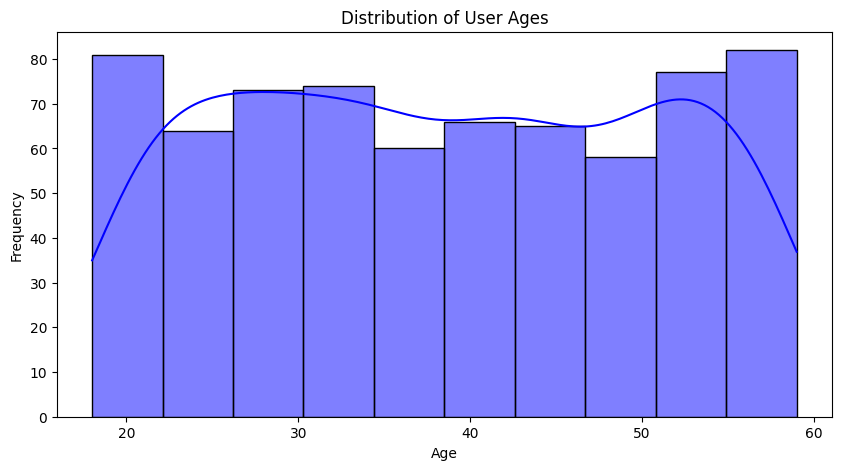

In [87]:
plt.figure(figsize=(10, 5))
sns.histplot(user_behavior["Age"], bins=10, kde=True, color="blue")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Distribution of User Ages")
plt.show()


## Insight 2: User Behavior Class Distribution is Highly Imbalanced

### **a. Insight Statement**
> 

---

### **b. Supporting Evidence**


---

### **c. Type of Analysis**
- 

### **d. Reproducible Code**

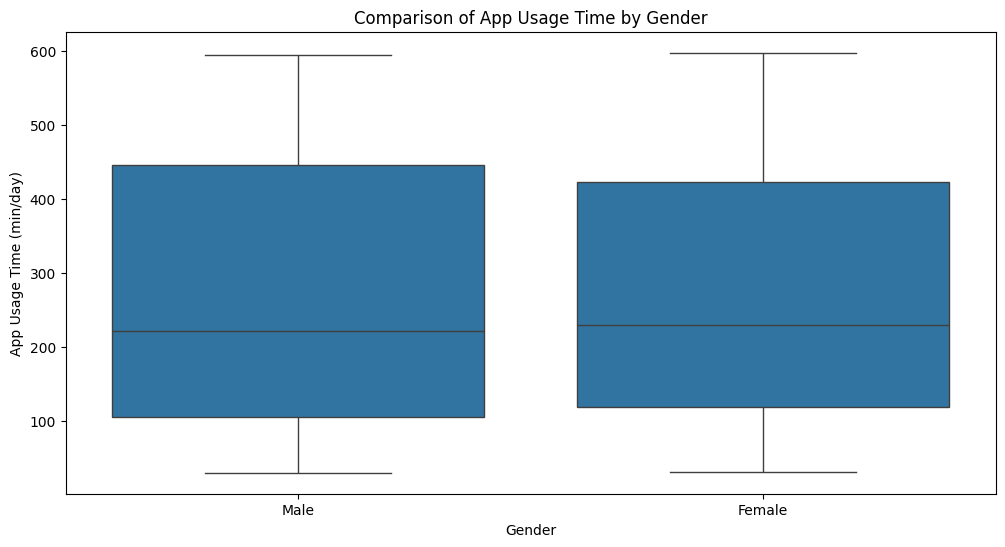

In [88]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="Gender", y="App Usage Time (min/day)", data=user_behavior)
plt.title("Comparison of App Usage Time by Gender")
plt.show()

## Insight 3: Android Users Have Significantly Higher Daily App Usage Time Than iOS Users

### **a. Insight Statement**
> Android Users Have Significantly Higher Daily App Usage Time Than iOS Users

---

### **b. Supporting Evidence**


---

### **c. Type of Analysis** 
- 

### **d. Reproducible Code**

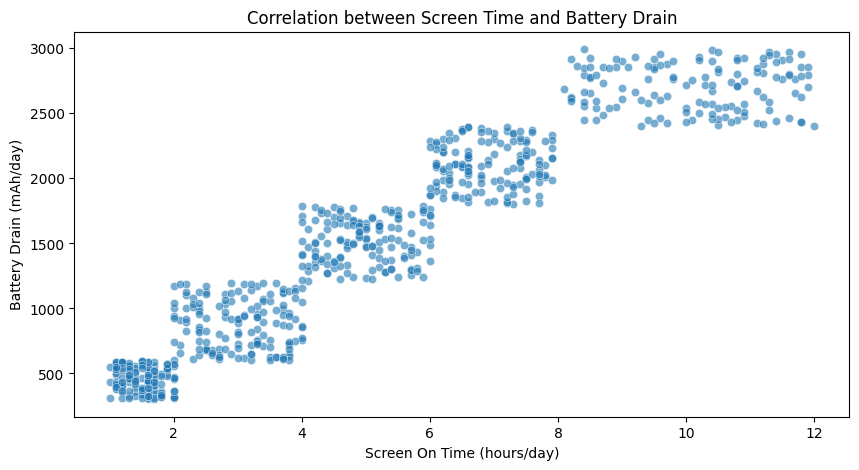

In [89]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x="Screen On Time (hours/day)", y="Battery Drain (mAh/day)", data=user_behavior, alpha=0.6)
plt.xlabel("Screen On Time (hours/day)")
plt.ylabel("Battery Drain (mAh/day)")
plt.title("Correlation between Screen Time and Battery Drain")
plt.show()


**Dataset II**  
**Dataset Population**

In [90]:
# Load the datasets
student_mat = pd.read_csv("dataset2/student-mat.csv", sep=",")
student_por = pd.read_csv("dataset2/student-por.csv", sep=",")

# Define full matching columns (excluding G1, G2, G3)
matching_columns = [
    "school","sex","age","address","famsize","Pstatus",
    "Medu","Fedu","Mjob","Fjob","reason","nursery","internet"
]

# Merge common students using identifier columns, suffixes for duplicate columns.
common_students = pd.merge(
    student_mat,
    student_por,
    on=matching_columns,
    suffixes=("_math", "_por")
)

# Save the dataset and verify the number of common students
# common_students.to_csv("dataset2/common_students.csv", index=False)
# print(f"Total common students: {common_students.shape[0]}")

## Insight 1: Grade Distribution in Math (r1)

### **a. Insight Statement**
> Math grades (`G3`) are concentrated around **10-15**, with fewer students achieving extreme scores.

---

### **b. Supporting Evidence**
The histogram below visualizes the grade distribution.  
**X-Axis:** *Final Grade (G3)* | **Y-Axis:** *Frequency*  
KDE curve highlights trends.

---

### **c. Type of Analysis**
**Univariate Distribution Analysis**

- This analysis examines the distribution of a single variable (G3 - final grade in Math).
- Used a **histogram with KDE** to analyze grade dispersion. 

---

### **d. Reproducible Code**

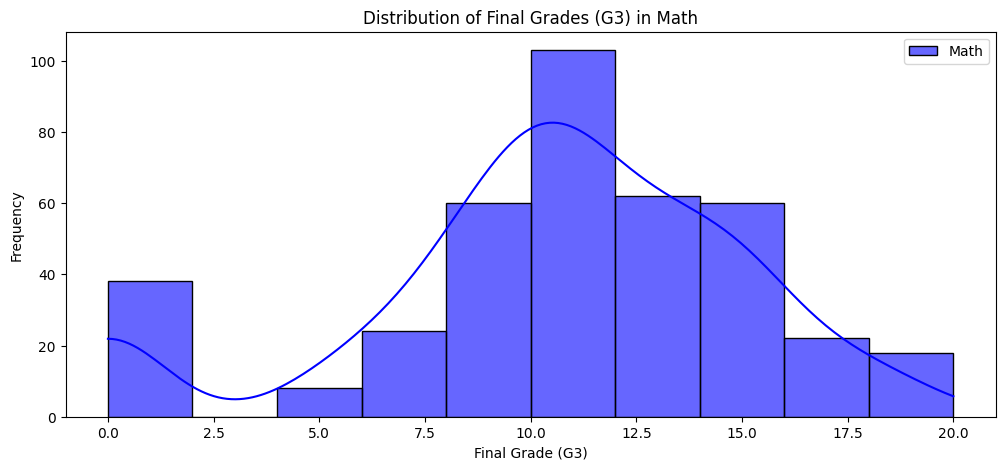

In [91]:
plt.figure(figsize=(12,5))

# Plot histogram for Math Grades (G3)
sns.histplot(student_mat["G3"], bins=10, kde=True, color="blue", label="Math", alpha=0.6)

# Plot histogram for Portuguese Grades (G3)
# sns.histplot(student_por["G3"], bins=10, kde=True, color="red", label="Portuguese", alpha=0.6)

# Labels and Title
plt.xlabel("Final Grade (G3)")
plt.ylabel("Frequency")
plt.title("Distribution of Final Grades (G3) in Math")
plt.legend()

# Show the plot
plt.show()

## Insight 2: Students' Reasons for Choosing Their School _(r2)_

### **a. Insight Statement**
> The most common `reason` for students choosing their school is **course preference**, followed by **proximity to home and school reputation**, while fewer students selected **other reasons**.

---

### **b. Supporting Evidence**
The countplot below shows the distribution of students' reasons for choosing their school.  
**X-Axis:** *Reason for Choosing School* | **Y-Axis:** *Count*  
The majority of students prioritize the specific **course preference**, followed by **proximity to home and reputation**.

---

### **c. Type of Analysis**
**Univariate Frequency Analysis**  
- Used **Seaborn's countplot** to analyze **a single categorical variable (`reason`)**.

---

### **d. Reproducible Code**

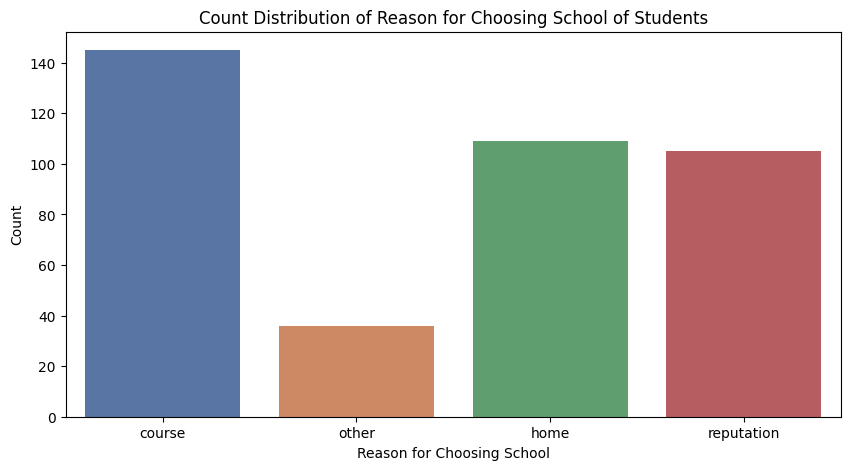

In [92]:
# Create figure
plt.figure(figsize=(10,5))

# Corrected Countplot with hue
sns.countplot(x="reason", data=student_mat, hue= "reason", palette="deep", legend=False)

# Labels and Title
plt.xlabel("Reason for Choosing School")
plt.ylabel("Count")
plt.title("Count Distribution of Reason for Choosing School of Students")

# Show plot
plt.show()

## Insight 3: Parental Education Levels Among Math Students _(r3)_

### **a. Insight Statement**
> Most students have parents with **lower education levels (0-3)**, while **higher education (4) is less common**.

---

### **b. Supporting Evidence**
The countplot below shows the **distribution of parental education levels** among students.  
**X-Axis:** *Parental Education Level (Grouped: 0-3 vs. 4)* | **Y-Axis:** *Count*  
<br>
It takes the higher (max) education level between the parents for each student, and group them into two categories: 0-3 and 4.  Since its original dataset clasifies the education level as numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education. Our approach is to see whether the education level for students' parents having higher education or not.  
It turns out majority of students belong to families where **parents have lower education levels**.

---

### **c. Type of Analysis**
**Univariate Frequency Analysis**  
- **One categorical variable (`parent_edu_group`)** analyzed.

---

### **d. Reproducible Code**

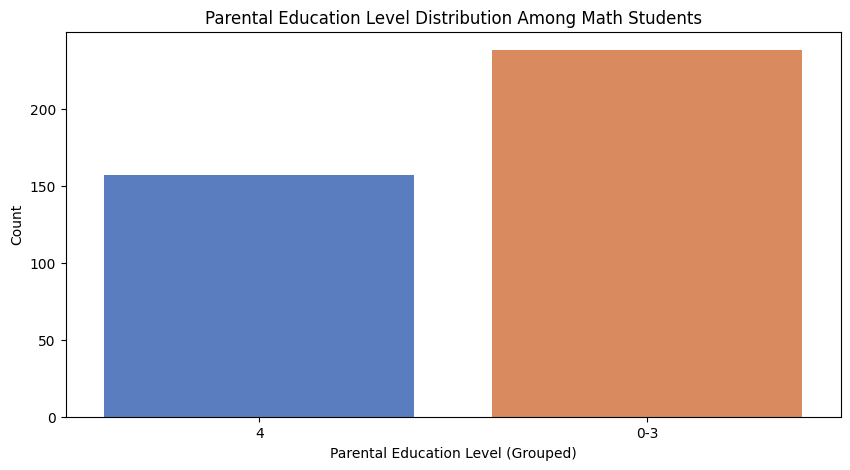

In [93]:
# Create a new column combining both Medu (Mother's Education) and Fedu (Father's Education)
student_mat["parent_edu"] = student_mat[["Medu", "Fedu"]].max(axis=1)

# Group parental education into '0-3' (Lower) and '4' (Higher)
student_mat["parent_edu_group"] = student_mat["parent_edu"].apply(lambda x: "0-3" if x < 4 else "4")

# Create figure
plt.figure(figsize=(10,5))

# Countplot for Parental Education
sns.countplot(x="parent_edu_group", data=student_mat, hue = "parent_edu_group", palette="muted", legend=False)

# Labels and Title
plt.xlabel("Parental Education Level (Grouped)")
plt.ylabel("Count")
plt.title("Parental Education Level Distribution Among Math Students")

# Show plot
plt.show()

## **Insight 4: Gender Comparison of Weekend Alcohol Consumption** _(r4)_

### **a. Insight Statement**  
> Male students tend to have lower weekend alcohol consumption, while female students are more represented in higher consumption levels.

---

### **b. Supporting Evidence**  
The countplot below compares **Weekend Alcohol Consumption (`Walc`)** between male and female students.  
- **X-Axis:** *Weekend Alcohol Consumption (1 - 5)*  
- **Y-Axis:** *Count of Students*  
- **Color-coded by Gender (Male = Blue, Female = Orange)** 

---

### **c. Type of Analysis**  
**Bivariate Categorical Analysis**  
- A **countplot** visualizes the count distribution of students consuming alcohol on weekends.  
- **Hue = Gender (`sex`)** allows comparison between male and female students.

---

### **d. Reproducible Code**


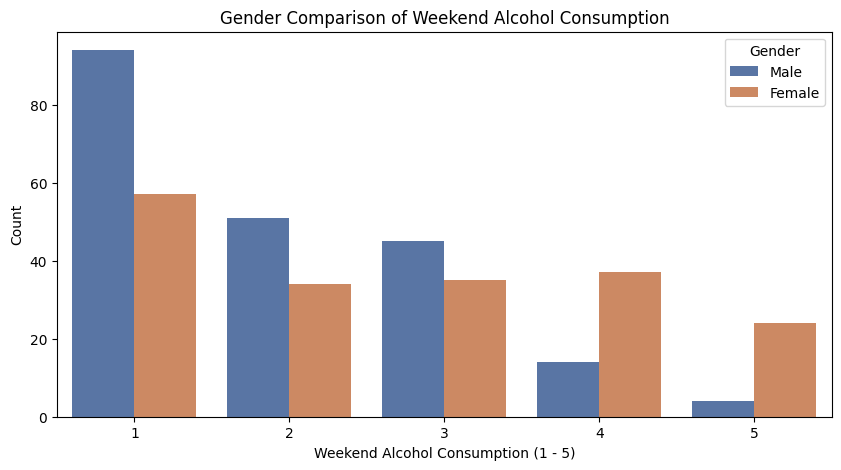

In [94]:
# Create figure
plt.figure(figsize=(10,5))

# Plot Countplot for Weekend Alcohol Consumption by Gender
sns.countplot(x="Walc", data=student_mat, hue="sex", palette="deep")

# Labels and Title
plt.xlabel("Weekend Alcohol Consumption (1 - 5)")
plt.ylabel("Count")
plt.title("Gender Comparison of Weekend Alcohol Consumption")

# Add Legend
plt.legend(title="Gender", labels=["Male", "Female"])

# Show plot
plt.show()